In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# List of Imports
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

import sympy as sp

#Creating Labels for Data (Fall vs Non Fall)
pd.options.display.float_format = '{:.1f}'.format
sns.set() 
plt.style.use('ggplot')
print('keras version ', keras.__version__)

LABELS = ['Fall','Non Fall']

TIME_PERIODS = 80
STEP_DISTANCE = 40

#Importing CSV (Specific to the Mobifall Dataset)
def read_data(file_path,User_number,Activity_class):
    User = []
    Activity = []
    
    column_names = ['ID',
                    'X',
                    'Y',
                    'Z',
                        ]  
    
    
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)
    df = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13],axis = 0)
    df = df.reset_index()
    df = df.drop(['index'],axis=1)
    
    for i in range(len(df['X'])):
        a = User_number
        User.append(User_number)
    for j in range(len(df['X'])):
        b = Activity_class
        Activity.append(Activity_class)
        
    df['Activity'] = Activity
    df['User'] = User
    
    df['User'] = df['User'].apply(convert_to_int)
    df['X'] = df['X'].apply(convert_to_float)
    df['Y'] = df['Y'].apply(convert_to_float)
    df['Z'] = df['Z'].apply(convert_to_float)
    df = df[['ID','User','Activity','X','Y','Z']]
    
   
    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan

def convert_to_int(x):

    try:
        return np.int(x)
    except:
        return np.nan
    
    
def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))
    
    

BSC_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_1_1.txt',1,'Backward Sitting Chair Fall')
BSC_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_2_1.txt',2,'Backward Sitting Chair Fall')
BSC_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_3_1.txt',3,'Backward Sitting Chair Fall')
BSC_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_4_1.txt',4,'Backward Sitting Chair Fall')
BSC_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_5_1.txt',5,'Backward Sitting Chair Fall')
BSC_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_6_1.txt',6,'Backward Sitting Chair Fall')
BSC_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_7_1.txt',7,'Backward Sitting Chair Fall')
BSC_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_8_1.txt',8,'Backward Sitting Chair Fall')
BSC_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_9_1.txt',9,'Backward Sitting Chair Fall')
BSC_10= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_10_1.txt',10,'Backward Sitting Chair Fall')
BSC_11= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_11_1.txt',11,'Backward Sitting Chair Fall')
BSC_12= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_12_1.txt',12,'Backward Sitting Chair Fall')
BSC_13= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_13_1.txt',13,'Backward Sitting Chair Fall')
BSC_14= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_14_1.txt',14,'Backward Sitting Chair Fall')
BSC_15= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_15_1.txt',15,'Backward Sitting Chair Fall')
BSC_16= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_16_1.txt',16,'Backward Sitting Chair Fall')
BSC_17= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_17_1.txt',17,'Backward Sitting Chair Fall')
BSC_18= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_18_1.txt',18,'Backward Sitting Chair Fall')
BSC_19= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_19_1.txt',19,'Backward Sitting Chair Fall')
BSC_20= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_20_1.txt',20,'Backward Sitting Chair Fall')
BSC_21= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_21_1.txt',21,'Backward Sitting Chair Fall')
BSC_22= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_22_1.txt',22,'Backward Sitting Chair Fall')
BSC_23= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_23_1.txt',23,'Backward Sitting Chair Fall')
BSC_24= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_24_1.txt',24,'Backward Sitting Chair Fall')
BSC_25= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_25_1.txt',25,'Backward Sitting Chair Fall')
BSC_26= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_26_1.txt',26,'Backward Sitting Chair Fall')
BSC_27= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_27_1.txt',27,'Backward Sitting Chair Fall')
BSC_28= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_28_1.txt',28,'Backward Sitting Chair Fall')
BSC_29= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_29_1.txt',29,'Backward Sitting Chair Fall')
BSC_30= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_30_1.txt',30,'Backward Sitting Chair Fall')
BSC_31= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_31_1.txt',31,'Backward Sitting Chair Fall')
BSC_32= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_32_1.txt',32,'Backward Sitting Chair Fall')
BSC_33= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_33_1.txt',33,'Backward Sitting Chair Fall')
BSC_34= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_34_1.txt',34,'Backward Sitting Chair Fall')
BSC_35= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_35_1.txt',35,'Backward Sitting Chair Fall')
BSC_36= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_36_1.txt',36,'Backward Sitting Chair Fall')
BSC_37= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_37_1.txt',37,'Backward Sitting Chair Fall')
BSC_38= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_38_1.txt',38,'Backward Sitting Chair Fall')
BSC_39= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_39_1.txt',39,'Backward Sitting Chair Fall')
BSC_40= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_40_1.txt',40,'Backward Sitting Chair Fall')

FKL_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_1_1.txt',1,'Forward Knees Fall')
FKL_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_2_1.txt',2,'Forward Knees Fall')
FKL_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_3_1.txt',3,'Forward Knees Fall')
FKL_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_4_1.txt',4,'Forward Knees Fall')
FKL_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_5_1.txt',5,'Forward Knees Fall')
FKL_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_6_1.txt',6,'Forward Knees Fall')
FKL_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_7_1.txt',7,'Forward Knees Fall')
FKL_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_8_1.txt',8,'Forward Knees Fall')
FKL_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_9_1.txt',9,'Forward Knees Fall')
FKL_10 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_10_1.txt',10,'Forward Knees Fall')
FKL_11 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_11_1.txt',11,'Forward Knees Fall')
FKL_12 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_12_1.txt',12,'Forward Knees Fall')
FKL_13 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_13_1.txt',13,'Forward Knees Fall')
FKL_14 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_14_1.txt',14,'Forward Knees Fall')
FKL_15 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_15_1.txt',15,'Forward Knees Fall')
FKL_16 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_16_1.txt',16,'Forward Knees Fall')
FKL_17 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_17_1.txt',17,'Forward Knees Fall')
FKL_18 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_18_1.txt',18,'Forward Knees Fall')
FKL_19 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_19_1.txt',19,'Forward Knees Fall')
FKL_20 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_20_1.txt',20,'Forward Knees Fall')
FKL_21 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_21_1.txt',21,'Forward Knees Fall')
FKL_22 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_22_1.txt',22,'Forward Knees Fall')
FKL_23 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_23_1.txt',23,'Forward Knees Fall')
FKL_24 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_24_1.txt',24,'Forward Knees Fall')
FKL_25 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_25_1.txt',25,'Forward Knees Fall')
FKL_26 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_26_1.txt',26,'Forward Knees Fall')
FKL_27 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_27_1.txt',27,'Forward Knees Fall')
FKL_28 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_28_1.txt',28,'Forward Knees Fall')
FKL_29 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_29_1.txt',29,'Forward Knees Fall')
FKL_30 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_30_1.txt',30,'Forward Knees Fall')
FKL_31 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_31_1.txt',31,'Forward Knees Fall')
FKL_32 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_32_1.txt',32,'Forward Knees Fall')
FKL_33 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_33_1.txt',33,'Forward Knees Fall')
FKL_34 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_34_1.txt',34,'Forward Knees Fall')
FKL_35 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_35_1.txt',35,'Forward Knees Fall')
FKL_36 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_36_1.txt',36,'Forward Knees Fall')
FKL_37 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_37_1.txt',37,'Forward Knees Fall')
FKL_38 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_38_1.txt',38,'Forward Knees Fall')
FKL_39 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_39_1.txt',39,'Forward Knees Fall')
FKL_40 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_40_1.txt',40,'Forward Knees Fall')

FOL_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_1_1.txt',1,'Forward Lying Fall')
FOL_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_2_1.txt',2,'Forward Lying Fall')
FOL_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_3_1.txt',3,'Forward Lying Fall')
FOL_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_4_1.txt',4,'Forward Lying Fall')
FOL_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_5_1.txt',5,'Forward Lying Fall')
FOL_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_6_1.txt',6,'Forward Lying Fall')
FOL_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_7_1.txt',7,'Forward Lying Fall')
FOL_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_8_1.txt',8,'Forward Lying Fall')
FOL_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_9_1.txt',9,'Forward Lying Fall')
FOL_10 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_10_1.txt',10,'Forward Lying Fall')
FOL_11 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_11_1.txt',11,'Forward Lying Fall')
FOL_12 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_12_1.txt',12,'Forward Lying Fall')
FOL_13 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_13_1.txt',13,'Forward Lying Fall')
FOL_14 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_14_1.txt',14,'Forward Lying Fall')
FOL_15 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_15_1.txt',15,'Forward Lying Fall')
FOL_16 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_16_1.txt',16,'Forward Lying Fall')
FOL_17 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_17_1.txt',17,'Forward Lying Fall')
FOL_18 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_18_1.txt',18,'Forward Lying Fall')
FOL_19 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_19_1.txt',19,'Forward Lying Fall')
FOL_20 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_20_1.txt',20,'Forward Lying Fall')
FOL_21 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_21_1.txt',21,'Forward Lying Fall')
FOL_22 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_22_1.txt',22,'Forward Lying Fall')
FOL_23 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_23_1.txt',23,'Forward Lying Fall')
FOL_24 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_24_1.txt',24,'Forward Lying Fall')
FOL_25 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_25_1.txt',25,'Forward Lying Fall')
FOL_26 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_26_1.txt',26,'Forward Lying Fall')
FOL_27 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_27_1.txt',27,'Forward Lying Fall')
FOL_28 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_28_1.txt',28,'Forward Lying Fall')
FOL_29 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_29_1.txt',29,'Forward Lying Fall')
FOL_30 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_20_1.txt',30,'Forward Lying Fall')
FOL_31 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_31_1.txt',31,'Forward Lying Fall')
FOL_32 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_32_1.txt',32,'Forward Lying Fall')
FOL_33 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_33_1.txt',33,'Forward Lying Fall')
FOL_34 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_34_1.txt',34,'Forward Lying Fall')
FOL_35 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_35_1.txt',35,'Forward Lying Fall')
FOL_36 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_36_1.txt',36,'Forward Lying Fall')
FOL_37 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_37_1.txt',37,'Forward Lying Fall')
FOL_38 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_38_1.txt',38,'Forward Lying Fall')
FOL_39 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_39_1.txt',39,'Forward Lying Fall')
FOL_40 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_40_1.txt',40,'Forward Lying Fall')

JOG_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_1_1.txt',1,'Jogging')
JOG_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_2_1.txt',2,'Jogging')
JOG_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_3_1.txt',3,'Jogging')
JOG_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_4_1.txt',4,'Jogging')
JOG_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_5_1.txt',5,'Jogging')
JOG_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_6_1.txt',6,'Jogging')
JOG_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_7_1.txt',7,'Jogging')
JOG_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_8_1.txt',8,'Jogging')
JOG_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_9_1.txt',9,'Jogging')
JOG_10 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_10_1.txt',10,'Jogging')
JOG_11 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_11_1.txt',11,'Jogging')
JOG_12 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_12_1.txt',12,'Jogging')
JOG_13 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_13_1.txt',13,'Jogging')
JOG_14 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_14_1.txt',14,'Jogging')
JOG_15 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_15_1.txt',15,'Jogging')
JOG_16 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_16_1.txt',16,'Jogging')
JOG_17 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_17_1.txt',17,'Jogging')
JOG_18 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_18_1.txt',18,'Jogging')
JOG_19 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_19_1.txt',19,'Jogging')
JOG_20 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_20_1.txt',20,'Jogging')
JOG_21 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_21_1.txt',21,'Jogging')
JOG_22 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_22_1.txt',22,'Jogging')
JOG_23 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_23_1.txt',23,'Jogging')
JOG_24 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_24_1.txt',24,'Jogging')
JOG_25 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_25_1.txt',25,'Jogging')
JOG_26 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_26_1.txt',26,'Jogging')
JOG_27 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_27_1.txt',27,'Jogging')
JOG_28 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_28_1.txt',28,'Jogging')
JOG_29 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_29_1.txt',29,'Jogging')
JOG_30 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_30_1.txt',30,'Jogging')
JOG_31 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_31_1.txt',31,'Jogging')
JOG_32 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_32_1.txt',32,'Jogging')
JOG_33 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_33_1.txt',33,'Jogging')
JOG_34 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_34_1.txt',34,'Jogging')
JOG_35 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_35_1.txt',35,'Jogging')
JOG_36 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_36_1.txt',36,'Jogging')
JOG_37 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_37_1.txt',37,'Jogging')
JOG_38 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_38_1.txt',38,'Jogging')
JOG_39 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_39_1.txt',39,'Jogging')
JOG_40 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_40_1.txt',40,'Jogging')

JUM_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_1_1.txt',1,'Jumping')
JUM_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_2_1.txt',2,'Jumping')
JUM_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_3_1.txt',3,'Jumping')
JUM_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_4_1.txt',4,'Jumping')
JUM_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_5_1.txt',5,'Jumping')
JUM_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_6_1.txt',6,'Jumping')
JUM_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_7_1.txt',7,'Jumping')
JUM_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_8_1.txt',8,'Jumping')
JUM_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_9_1.txt',9,'Jumping')
JUM_10 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_10_1.txt',10,'Jumping')
JUM_11 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_11_1.txt',11,'Jumping')
JUM_12= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_12_1.txt',12,'Jumping')
JUM_13 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_13_1.txt',13,'Jumping')
JUM_14= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_14_1.txt',14,'Jumping')
JUM_15= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_15_1.txt',15,'Jumping')
JUM_16= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_16_1.txt',16,'Jumping')
JUM_17= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_17_1.txt',17,'Jumping')
JUM_18= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_18_1.txt',18,'Jumping')
JUM_19= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_19_1.txt',19,'Jumping')
JUM_20= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_20_1.txt',20,'Jumping')
JUM_21= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_21_1.txt',21,'Jumping')
JUM_22= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_22_1.txt',22,'Jumping')
JUM_23= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_23_1.txt',23,'Jumping')
JUM_24= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_24_1.txt',24,'Jumping')
JUM_25= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_25_1.txt',25,'Jumping')
JUM_26= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_26_1.txt',26,'Jumping')
JUM_27= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_27_1.txt',27,'Jumping')
JUM_28= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_28_1.txt',28,'Jumping')
JUM_29= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_29_1.txt',29,'Jumping')
JUM_30= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_30_1.txt',30,'Jumping')
JUM_31= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_31_1.txt',31,'Jumping')
JUM_32= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_32_1.txt',32,'Jumping')
JUM_33= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_33_1.txt',33,'Jumping')
JUM_34= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_34_1.txt',34,'Jumping')
JUM_35= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_35_1.txt',35,'Jumping')
JUM_36= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_36_1.txt',36,'Jumping')
JUM_37= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_37_1.txt',37,'Jumping')
JUM_38= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_38_1.txt',38,'Jumping')
JUM_39= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_39_1.txt',39,'Jumping')
JUM_40= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_40_1.txt',40,'Jumping')

STD_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_1_1.txt',1,'Standing')
STD_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_2_1.txt',2,'Standing')
STD_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_3_1.txt',3,'Standing')
STD_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_4_1.txt',4,'Standing')
STD_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_5_1.txt',5,'Standing')
STD_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_6_1.txt',6,'Standing')
STD_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_7_1.txt',7,'Standing')
STD_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_8_1.txt',8,'Standing')
STD_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_9_1.txt',9,'Standing')
STD_10= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_10_1.txt',10,'Standing')
STD_11= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_11_1.txt',11,'Standing')
STD_12= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_12_1.txt',12,'Standing')
STD_13= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_13_1.txt',13,'Standing')
STD_14= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_14_1.txt',14,'Standing')
STD_15= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_15_1.txt',15,'Standing')
STD_16= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_16_1.txt',16,'Standing')
STD_17= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_17_1.txt',17,'Standing')
STD_18= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_18_1.txt',18,'Standing')
STD_19= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_19_1.txt',19,'Standing')
STD_20= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_20_1.txt',20,'Standing')
STD_21= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_21_1.txt',21,'Standing')
STD_22= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_22_1.txt',22,'Standing')
STD_23= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_23_1.txt',23,'Standing')
STD_24= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_24_1.txt',24,'Standing')
STD_25= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_25_1.txt',25,'Standing')
STD_26= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_26_1.txt',26,'Standing')
STD_27= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_27_1.txt',27,'Standing')
STD_28= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_28_1.txt',28,'Standing')
STD_29= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_29_1.txt',29,'Standing')
STD_30= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_30_1.txt',30,'Standing')
STD_31= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_31_1.txt',31,'Standing')
STD_32= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_32_1.txt',32,'Standing')
STD_33= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_33_1.txt',33,'Standing')
STD_34= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_34_1.txt',34,'Standing')
STD_35= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_35_1.txt',35,'Standing')
STD_36= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_36_1.txt',36,'Standing')
STD_37= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_37_1.txt',37,'Standing')
STD_38= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_38_1.txt',38,'Standing')
STD_39= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_39_1.txt',39,'Standing')
STD_40= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_40_1.txt',40,'Standing')

# Deleting Activities Class from data set and reconstructing activities as FALL
Fall = [BSC_1,BSC_2,BSC_3,BSC_4,BSC_5,BSC_6,BSC_7,BSC_8,BSC_9,BSC_10,BSC_11,BSC_12,BSC_13,BSC_14,BSC_15,BSC_16,BSC_17,BSC_18,BSC_19,BSC_20,BSC_21,BSC_22,BSC_23,BSC_24,BSC_25,BSC_26,BSC_27,BSC_28,BSC_29,BSC_30,BSC_31,BSC_32,BSC_33,BSC_34,BSC_35,BSC_36,BSC_37,BSC_38,BSC_39,BSC_40,
        FKL_1,FKL_2,FKL_3,FKL_4,FKL_5,FKL_6,FKL_7,FKL_8,FKL_9,FKL_10,FKL_11,FKL_12,FKL_13,FKL_14,FKL_15,FKL_16,FKL_17,FKL_18,FKL_19,FKL_20,FKL_21,FKL_22,FKL_23,FKL_24,FKL_25,FKL_26,FKL_27,FKL_28,FKL_29,FKL_30,FKL_31,FKL_32,FKL_33,FKL_34,FKL_35,FKL_36,FKL_37,FKL_38,FKL_39,FKL_40,
        FOL_1,FOL_2,FOL_3,FOL_4,FOL_5,FOL_6,FOL_7,FOL_8,FOL_9,FOL_10,FOL_11,FOL_12,FOL_13,FOL_14,FOL_15,FOL_16,FOL_17,FOL_18,FOL_19,FOL_20,FOL_21,FOL_22,FOL_23,FOL_24,FOL_25,FOL_26,FOL_27,FOL_28,FOL_29,FOL_30,FOL_31,FOL_32,FOL_33,FOL_34,FOL_35,FOL_36,FOL_37,FOL_38,FOL_39,FOL_40]
storage = []
for i in range(len((pd.concat(Fall)).drop(['Activity'],axis=1)['X'])):
    a = 'Fall'
    storage.append(a)
Fall_DataFrame = (pd.concat(Fall)).drop(['Activity'],axis=1)
Fall_DataFrame['Activity'] = storage
Fall_DataFrame = Fall_DataFrame[['ID','User','Activity','X','Y','Z']]
Fall_DataFrame.head()


# Deleting Activities Class from data set and reconstructing activities as NON FALL
Non_Fall = [JOG_1,JOG_2,JOG_3,JOG_4,JOG_5,JOG_6,JOG_7,JOG_8,JOG_9,JOG_10,JOG_11,JOG_12,JOG_13,JOG_14,JOG_15,JOG_16,JOG_17,JOG_18,JOG_19,JOG_20,JOG_21,JOG_22,JOG_23,JOG_24,JOG_25,JOG_26,JOG_27,JOG_28,JOG_29,JOG_30,JOG_31,JOG_32,JOG_33,JOG_34,JOG_35,JOG_36,JOG_37,JOG_38,JOG_39,JOG_40,
            JUM_1,JUM_2,JUM_3,JUM_4,JUM_5,JUM_6,JUM_7,JUM_8,JUM_9,JUM_10,JUM_11,JUM_12,JUM_13,JUM_14,JUM_15,JUM_16,JUM_17,JUM_18,JUM_19,JUM_20,JUM_21,JUM_22,JUM_23,JUM_24,JUM_25,JUM_26,JUM_27,JUM_28,JUM_29,JUM_30,JUM_31,JUM_32,JUM_33,JUM_34,JUM_35,JUM_36,JUM_37,JUM_38,JUM_39,JUM_40,
            STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12,STD_13,STD_14,STD_15,STD_16,STD_17,STD_18,STD_19,STD_20,STD_21,STD_22,STD_23,STD_24,STD_25,STD_26,STD_27,STD_28,STD_29,STD_30,STD_31,STD_32,STD_33,STD_34,STD_35,STD_36,STD_37,STD_38,STD_39,STD_40]

storage1 = []
for i in range(len((pd.concat(Non_Fall)).drop(['Activity'],axis=1)['X'])):
    a = 'Non Fall'
    storage1.append(a)
Non_Fall_DataFrame = (pd.concat(Non_Fall)).drop(['Activity'],axis=1)
Non_Fall_DataFrame['Activity'] = storage1
Non_Fall_DataFrame = Non_Fall_DataFrame[['ID','User','Activity','X','Y','Z']]
Non_Fall_DataFrame.head()

# Concatenating the FALL and NON FALL into one DATAFRAME
df = pd.concat([Fall_DataFrame,Non_Fall_DataFrame])


keras version  2.2.4


In [7]:
Non_Fall_DataFrame.shape

(1109345, 6)

In [4]:
# Data Preprocessing Training Set and Testing Set
#This Code adds an extra column to the dataframe called ActivityEncoded which coverts all fall labels to '0' and non falls to '1'
LABEL = 'ActivityEncoded'
le = preprocessing.LabelEncoder()
df[LABEL] = le.fit_transform(df['Activity'].values.ravel())
df.shape

(1204056, 7)

In [5]:
df_raw = df.drop(['ID','User','Activity','ActivityEncoded'],axis=1)

# Max DataFrame

In [6]:
df_max = df_raw.max(axis=1)
df_max = pd.DataFrame(df_max,columns=['Max'])

# Min DataFrame

In [7]:
df_min = df_raw.min(axis=1)
df_min = pd.DataFrame(df_min,columns=['Min'])

# Mean DataFrame

In [8]:
df_mean = np. mean(df_raw,axis=1)
df_mean = pd.DataFrame(df_mean,columns=['Mean'])

# Median DataFrame

In [9]:
df_median = df_raw.median(axis=1)
df_median = pd.DataFrame(df_median,columns=['Median'])

# Standard Deviation DataFrame (Std)

In [10]:
df_std = df_raw.std(axis=1)
df_std = pd.DataFrame(df_std,columns=['Std'])

# Mean Absolute Deviation (Mad)

In [11]:
df_mad = df_raw.mad(axis=1)
df_mad = pd.DataFrame(df_mad,columns=['Mad'])

# Resultant (SMV)

In [12]:
df_smv = np.sqrt(df_raw['X']**2 + df_raw['Y']**2 + df_raw['Z']**2 )
df_smv = pd.DataFrame(df_smv,columns=['SMV'])

# Statistical DataFrame

In [13]:
labs = ['Max','Min','Median','Mean','SMV','Std','Mad']

df_activity = pd.DataFrame(df['Activity'],columns=['Activity'])
df_activity_encoded = pd.DataFrame(df['ActivityEncoded'],columns=['ActivityEncoded'])
df_user = pd.DataFrame(df['User'],columns=['User'])

#Do Not Alter
df_stat = pd.concat([df_user,df_activity,df_raw,df_activity_encoded,df_max,df_min,df_mean,df_median,df_std,df_mad,df_smv],axis=1)
#Alter
df_x = df_stat[labs]
df_stat.head()

,User,Activity,X,Y,Z,ActivityEncoded,Max,Min,Mean,Median,Std,Mad,SMV
0,1,Fall,0.9,-9.6,-0.0,0,0.9,-9.6,-2.9,-0.0,5.8,4.5,9.6
1,1,Fall,0.9,-9.6,-0.1,0,0.9,-9.6,-2.9,-0.1,5.8,4.5,9.6
2,1,Fall,0.9,-9.6,-0.1,0,0.9,-9.6,-2.9,-0.1,5.8,4.4,9.6
3,1,Fall,0.9,-9.6,-0.0,0,0.9,-9.6,-2.9,-0.0,5.8,4.5,9.7
4,1,Fall,0.9,-9.6,-0.1,0,0.9,-9.6,-2.9,-0.1,5.8,4.5,9.7


# PCA DataFrame (Statistical Dataset))

In [14]:
scaler = StandardScaler()
scaled_stat = scaler.fit_transform(df_x)
scaled_raw = scaler.fit_transform(df[['X','Y','Z']])
normalised_stat_x = pd.DataFrame(scaled_stat,columns=labs)
normalised_raw_x = pd.DataFrame(scaled_raw,columns=['X','Y','Z'])
normalised_raw_x.shape

(1204056, 3)

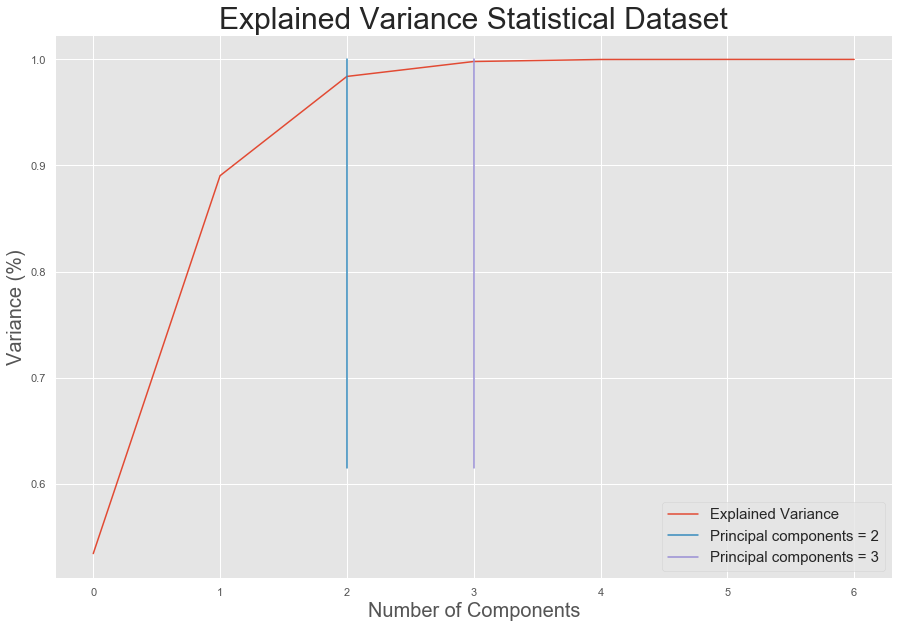

In [15]:
pca = PCA().fit(normalised_stat_x)
plot_labs = ['Explained Variance','Principal components = 2','Principal components = 3']
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize = (15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'-')
plt.plot([2,2],[0.615,1],'-')
plt.plot([3,3],[0.615,1])
plt.xlabel('Number of Components',fontsize = 20)
plt.ylabel('Variance (%)',fontsize = 20) #for each component
plt.legend(loc='lower right',labels=plot_labs,fontsize=15)
plt.title('Explained Variance Statistical Dataset',fontsize=30)
plt.show()

In [16]:
p3 = PCA(n_components=3)
p4 = PCA(n_components=4)
df_stat_x =pd.DataFrame( p4.fit_transform(scaled_stat),columns=['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4'])
df_raw_x = pd.DataFrame( p3.fit_transform(scaled_raw),columns=['Principal Component 1','Principal Component 2','Principal Component 3'])

In [17]:
explained_variance = p3.explained_variance_ratio_
explained_variance


array([0.37234886, 0.33039162, 0.29725952])

In [18]:
r1 = np.reshape(np.array(df['ActivityEncoded']),(1204056,1))
r2 = np.reshape(np.array(df['User']),(1204056,1))
r3 = np.reshape(np.array(df_stat_x['Principal Component 1']),(1204056,1))
r4 = np.reshape(np.array(df_stat_x['Principal Component 2']),(1204056,1))
r5 = np.reshape(np.array(df_stat_x['Principal Component 3']),(1204056,1))
r6 = np.reshape(np.array(df_stat_x['Principal Component 4']),(1204056,1))

r11 = pd.DataFrame(r1,columns=['ActivityEncoded'])
r22 = pd.DataFrame(r2,columns=['User'])
r33 = pd.DataFrame(r3,columns=['Principal Component 1'])
r44 = pd.DataFrame(r4,columns=['Principal Component 2'])
r55 = pd.DataFrame(r5,columns=['Principal Component 3'])
r66 = pd.DataFrame(r6,columns=['Principal Component 4'])


##############################################################
#PCA Statistical DataFrame
##############################################################
df_pca = pd.concat([r11,r22,r33,r44,r55,r66],axis=1)

##############################################################
#PCA RAW DataFrame
##############################################################
s1 = np.reshape(np.array(df['ActivityEncoded']),(1204056,1))
s2 = np.reshape(np.array(df['User']),(1204056,1))
s3 = np.reshape(np.array(df_raw_x['Principal Component 1']),(1204056,1))
s4 = np.reshape(np.array(df_raw_x['Principal Component 2']),(1204056,1))
s5 = np.reshape(np.array(df_raw_x['Principal Component 3']),(1204056,1))


s11 = pd.DataFrame(s1,columns=['ActivityEncoded'])
s22 = pd.DataFrame(s2,columns=['User'])
s33 = pd.DataFrame(s3,columns=['Principal Component 1'])
s44 = pd.DataFrame(s4,columns=['Principal Component 2'])
s55 = pd.DataFrame(s5,columns=['Principal Component 3'])

df_pca_raw = pd.concat([s11,s22,s33,s44,s55],axis=1)
df_pca.head()

,ActivityEncoded,User,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,0,1,-1.8,3.9,2.0,0.4
1,0,1,-1.8,3.9,2.0,0.4
2,0,1,-1.8,3.9,2.0,0.4
3,0,1,-1.8,4.0,2.0,0.4
4,0,1,-1.8,4.0,2.0,0.4


In [19]:
p_1 = df_pca[['Principal Component 1']]
p_2 = df_pca[['Principal Component 2']]
p_3 = df_pca[['Principal Component 3']]
p_4 = df_pca[['Principal Component 4']]
y_1 = df_pca[['ActivityEncoded']]
finalDf = pd.concat([p_1,p_2,p_3,p_4,y_1],axis=1)
finalDf = finalDf.reset_index()
finalDf = finalDf.drop(['index'],axis=1)


p_11 = df_pca_raw[['Principal Component 1']]
p_22 = df_pca_raw[['Principal Component 2']]
p_33 = df_pca_raw[['Principal Component 3']]
y_11 = df_pca_raw[['ActivityEncoded']]

finalDf_raw = pd.concat([p_11,p_22,p_33,y_11],axis=1)
finalDf_raw = finalDf_raw.reset_index()
finalDf_raw = finalDf_raw.drop(['index'],axis=1)
finalDf_raw.head()

,Principal Component 1,Principal Component 2,Principal Component 3,ActivityEncoded
0,2.4,0.0,2.5,0
1,2.4,0.0,2.5,0
2,2.4,0.0,2.5,0
3,2.4,0.1,2.5,0
4,2.4,0.0,2.5,0


In [20]:
# fig = plt.figure(figsize = (15,15))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 20)
# ax.set_ylabel('Principal Component 2', fontsize = 20)
# ax.set_title('2 component PCA', fontsize = 30)
# targets = [1,0]
# colors = ['g','r']

# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['ActivityEncoded'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
#                , finalDf.loc[indicesToKeep, 'Principal Component 2']
#                , c = color
#                , s = 50)
# ax.legend(labels=['Non-Fall','Fall'],fontsize=20)
# ax.grid()    

In [21]:
df_stat.head()

,User,Activity,X,Y,Z,ActivityEncoded,Max,Min,Mean,Median,Std,Mad,SMV
0,1,Fall,0.9,-9.6,-0.0,0,0.9,-9.6,-2.9,-0.0,5.8,4.5,9.6
1,1,Fall,0.9,-9.6,-0.1,0,0.9,-9.6,-2.9,-0.1,5.8,4.5,9.6
2,1,Fall,0.9,-9.6,-0.1,0,0.9,-9.6,-2.9,-0.1,5.8,4.4,9.6
3,1,Fall,0.9,-9.6,-0.0,0,0.9,-9.6,-2.9,-0.0,5.8,4.5,9.7
4,1,Fall,0.9,-9.6,-0.1,0,0.9,-9.6,-2.9,-0.1,5.8,4.5,9.7


# Dummy Dataset

In [22]:
def reset():
    df1 = np.array(df_raw)
    df2= np.array(df_stat.drop(['Activity','X','Y','Z','Max','Min','Mean','Median','Std','Mad','User','ActivityEncoded'],axis = 1))
    df3 = np.array(df_pca.drop(['ActivityEncoded','User'],axis=1))
    
    df11 = pd.DataFrame(df1,columns=['X','Y','Z'])
    df22 = pd.DataFrame(df2,columns=['SMV'])
    df33 = pd.DataFrame(df3,columns=['Principal Component 1','Principal Component 2','Principal Component 3','Principal Component 4'])
    df44 = pd.DataFrame((np.array(df[['ActivityEncoded','User']])),columns=['ActivityEncoded','User'])
    
    df_testing = pd.concat([df11,df22,df33,df44],axis=1)
    
    return df_testing

df_testing = reset()
df_testing.head()

,X,Y,Z,SMV,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,ActivityEncoded,User
0,0.9,-9.6,-0.0,9.6,-1.8,3.9,2.0,0.4,0,1
1,0.9,-9.6,-0.1,9.6,-1.8,3.9,2.0,0.4,0,1
2,0.9,-9.6,-0.1,9.6,-1.8,3.9,2.0,0.4,0,1
3,0.9,-9.6,-0.0,9.7,-1.8,4.0,2.0,0.4,0,1
4,0.9,-9.6,-0.1,9.7,-1.8,4.0,2.0,0.4,0,1


# Setting Up Testing and Training for 3 Datasets

In [24]:
lab = labs

def testing(b):
    
    df_test_pca = df_pca[df_pca['User'] > 36]
    df_train_pca = df_pca[df_pca['User'] <= 36]
    
    df_test_pca_raw = df_pca_raw[df_pca_raw['User'] > 36]
    df_train_pca_raw = df_pca_raw[df_pca_raw['User'] <= 36]
    
    df_test_stat = df_stat[df_stat['User'] > 36]
    df_train_stat = df_stat[df_stat['User'] <= 36]
    
    df_test = df[df['User'] > 36]
    df_train = df[df['User'] <= 36]
    
    df_testing_test = df_testing[df_testing['User'] > 36]
    df_testing_train = df_testing[df_testing['User'] <= 36]
    
    
    
    a = b
    
    raw = 1
    stat = 2
    pca_stat = 3
    pca_raw = 4
    test = 5
    
    if a == raw:
        x_train = df_train[['X','Y','Z']]
        x_test = df_test[['X','Y','Z']]
        
        y_train = df_train['ActivityEncoded']
        y_test = df_test['ActivityEncoded']
    if a == stat:
        x_train = df_train_stat[lab]
        x_test = df_test_stat[lab]
        
        y_train = df_train_stat['ActivityEncoded']
        y_test = df_test_stat['ActivityEncoded']
    if a == pca_stat:
        x_train = df_train_pca[['Principal Component 1','Principal Component 2','Principal Component 3']]
        x_test = df_test_pca[['Principal Component 1','Principal Component 2','Principal Component 3']]
        
        y_train = df_train_pca['ActivityEncoded']
        y_test = df_test_pca['ActivityEncoded']
        
    if a == pca_raw:
        x_train = df_train_pca_raw[['Principal Component 1','Principal Component 2','Principal Component 3']]
        x_test = df_test_pca_raw[['Principal Component 1','Principal Component 2','Principal Component 3']]
        
        y_train = df_train_pca['ActivityEncoded']
        y_test = df_test_pca['ActivityEncoded']
    
    if a == test:
        x_train = df_testing_train[['SMV','Principal Component 1','Principal Component 2','Principal Component 3']]
        x_test = df_testing_test[['SMV','Principal Component 1','Principal Component 2','Principal Component 3']]
        
#         x_train = df_testing_train[['X','Y','Z','SMV']]
#         x_test = df_testing_test[['X','Y','Z','SMV']]
#         x_train = df_testing_train[['SMV']]
#         x_test = df_testing_test[['SMV']]
        
        y_train = df_train_pca['ActivityEncoded']
        y_test = df_test_pca['ActivityEncoded']
    
    
    return x_train,x_test,y_train,y_test


raw = 1
stat = 2
pca_stat = 3
pca_raw = 4
test = 5

x_train_raw,x_test_raw,y_train,y_test = testing(raw)
x_train_pca,x_test_pca,y_train,y_test = testing(pca_stat)


x_train_pca = pd.DataFrame(np.array(x_train_pca),columns=['Principal Component 1','Principal Component 2','Principal Component 3'])
x_train_pca = pd.DataFrame(np.array(x_train_pca),columns=['Principal Component 1','Principal Component 2','Principal Component 3'])
x_test_pca = pd.DataFrame(np.array(x_test_pca),columns=['Principal Component 1','Principal Component 2','Principal Component 3'])
x_test_pca = pd.DataFrame(np.array(x_test_pca),columns=['Principal Component 1','Principal Component 2','Principal Component 3'])


x_train_raw = pd.DataFrame(np.array(x_train_raw),columns=['X','Y','X'])
x_train_raw = pd.DataFrame(np.array(x_train_raw),columns=['X','Y','X'])
x_test_raw = pd.DataFrame(np.array(x_test_raw),columns=['X','Y','X'])
x_test_raw = pd.DataFrame(np.array(x_test_raw),columns=['X','Y','X'])


#Comment 1 out
x_train,x_test,y_train,y_test = testing(stat)
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
# Concating Raw and PCA set
#x_train,x_test = pd.concat([x_train_raw,x_train_pca],axis = 1),pd.concat([x_test_raw,x_test_pca],axis = 1)
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
# Normalising RAW set
#x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=['X','Y','Z']) 
#x_test = pd.DataFrame(scaler.fit_transform(x_test),columns=['X','Y','Z'])    
#---------------------------------------------------------------------------------------------------------------------------------------------------------------

x_train.head()


,Max,Min,Median,Mean,SMV,Std,Mad
0,0.9,-9.6,-0.0,-2.9,9.6,5.8,4.5
1,0.9,-9.6,-0.1,-2.9,9.6,5.8,4.5
2,0.9,-9.6,-0.1,-2.9,9.6,5.8,4.4
3,0.9,-9.6,-0.0,-2.9,9.7,5.8,4.5
4,0.9,-9.6,-0.1,-2.9,9.7,5.8,4.5


# ----------------------TRAINING---SUPERVISED--------------------------------------------------------------------------------------------------------------------------------------

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test, y_test)))

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier               
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_test, y_test)))

# Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

# Linear SVC (Takes Very Long)

In [ ]:
#from sklearn.svm import SVC
#svm = SVC()
#svm.fit(x_train, y_train)
#print('Accuracy of SVM classifier on training set: {:.2f}'
#     .format(svm.score(x_train, y_train)))
#print('Accuracy of SVM classifier on test set: {:.2f}'
#     .format(svm.score(x_test, y_test)))

# Plotting ROC Curves

In [ ]:
#Logistic Regression
probas_logreg = logreg.fit(x_train, y_train).predict_proba(x_test)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, probas_logreg[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
print("Area under the ROC curve Logistic Regression : %f" % roc_auc_logreg)
#Decision Tree Classifier
probas_clf = clf.fit(x_train, y_train).predict_proba(x_test)
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test, probas_clf[:, 1])
roc_auc_clf = auc(fpr_clf, tpr_clf)
print("Area under the ROC curve Decision Tree Classifier : %f" % roc_auc_clf)
#KNN
probas_knn = knn.fit(x_train, y_train).predict_proba(x_test)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probas_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("Area under the ROC curve KNN : %f" % roc_auc_knn)
#Linear Discriminant Analysis
probas_lda = lda.fit(x_train, y_train).predict_proba(x_test)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, probas_lda[:, 1])
roc_auc_lda = auc(fpr_lda, tpr_lda)
print("Area under the ROC curve LDA : %f" % roc_auc_lda)
#Gaussian
probas_gnb = gnb.fit(x_train, y_train).predict_proba(x_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, probas_gnb[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
print("Area under the ROC curve GNB : %f" % roc_auc_gnb)




#SVC
#probas_svm = svm.fit(x_train_pca, y_train).predict_proba(x_test_pca)
#fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probas_svm[:, 1])
#roc_auc_svm = auc(fpr_svm, tpr_svm)
#print("Area under the ROC curve SVM : %f" % roc_auc_svm)

In [ ]:
probas_lda[:, 1]

In [ ]:
plt.figure(figsize=(20,20)).set_facecolor("w")
plt.style.use('classic')
plt.grid(True)
plt.plot(fpr_gnb, tpr_gnb,linewidth =5, label='ROC curve GNB (area = %0.2f)' % roc_auc_gnb)
plt.plot(fpr_lda, tpr_lda,linewidth =5, label='ROC curve LDA (area = %0.2f)' % roc_auc_lda)
plt.plot(fpr_knn, tpr_knn,linewidth =5, label='ROC curve KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_clf, tpr_clf,linewidth =5, label='ROC curve Decision Tree Classifier (area = %0.2f)' % roc_auc_clf)
plt.plot(fpr_logreg, tpr_logreg,linewidth =5, label='ROC curve Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_svm, tpr_svm, label='ROC curve SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], '-',linewidth =5)
plt.xlabel('False Positive Rate',fontsize=40)
plt.ylabel('True Positive Rate',fontsize = 40)
plt.title('ROC Curve (Public Dataset Accelerometer X, Y, Z)',fontsize=50)
plt.legend(loc="lower right",fontsize=30)
plt.show()


In [ ]:
def new_confusion_matrix(validations, model):
    a = model
    predictions = a.predict(x_test)

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(10,10 ))
    sns.set(font_scale=2)
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d',annot_kws={"size": 20})
    plt.title('Confusion Matrix',fontsize = 30)
    plt.ylabel('True Label',fontsize = 30)
    plt.xlabel('Predicted Label',fontsize = 30)
    plot = plt.show()
   
    
    return plot,  predictions

    
confusion_matrix,predictions = new_confusion_matrix(y_test, knn)
print(classification_report(y_test, predictions))


# Keras

# Defining ''Df''

In [86]:
def df_frame(b):
    
    df_test_pca = df_pca[df_pca['User'] > 36]
    df_train_pca = df_pca[df_pca['User'] <= 36]
    
    df_test_pca_raw = df_pca_raw[df_pca_raw['User'] > 36]
    df_train_pca_raw = df_pca_raw[df_pca_raw['User'] <= 36]
    
    df_test_stat = df_stat[df_stat['User'] > 36]
    df_train_stat = df_stat[df_stat['User'] <= 36]
    
    df_test = df[df['User'] > 36]
    df_train = df[df['User'] <= 36]
    
    df_testing_test = df_testing[df_testing['User'] > 36]
    df_testing_train = df_testing[df_testing['User'] <= 36]
    
    
    
    a = b
    
    raw = 1
    stat = 2
    pca_stat = 3
    pca_raw = 4
    test = 5
    
    if a == raw:
        df_train = df_train
        df_test = df_test
        
    if a == stat:
        df_train = df_train_stat
        df_test = df_test_stat
        
    if a == pca_stat:
        df_train = df_train_pca
        df_test = df_test_pca
        
    if a == pca_raw:
        df_train = df_train_pca_raw
        df_test = df_test_pca_raw
    
    if a == test:
        df_train = df_testing_train
        df_test = df_testing_test
    
    return df_train,df_test

raw = 1
stat = 2
pca_stat = 3
pca_raw = 4
test = 5

df_train,df_test = df_frame(stat)
df_train.head()

,User,Activity,X,Y,Z,ActivityEncoded,Max,Min,Mean,Median,Std,Mad,SMV
0,1,Fall,0.9,-9.6,-0.0,0,0.9,-9.6,-2.9,-0.0,5.8,4.5,9.6
1,1,Fall,0.9,-9.6,-0.1,0,0.9,-9.6,-2.9,-0.1,5.8,4.5,9.6
2,1,Fall,0.9,-9.6,-0.1,0,0.9,-9.6,-2.9,-0.1,5.8,4.4,9.6
3,1,Fall,0.9,-9.6,-0.0,0,0.9,-9.6,-2.9,-0.0,5.8,4.5,9.7
4,1,Fall,0.9,-9.6,-0.1,0,0.9,-9.6,-2.9,-0.1,5.8,4.5,9.7


In [87]:
#This functions creates segments of the training set, essentially creating a better form that will be accepted by KERAS but can also be used by supervised learning 
def create_segments_and_labels(df, time_steps, step, label_name):

    N_FEATURES = 6           # DONT FORGET TO ADJUST NUMBER OF FEATURES
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['Max'].values[i: i + time_steps]                      ######### CHANGE THESE ACCORDING TO THE LABELS IN THE DATAFRAME######################################################
        ys = df['Min'].values[i: i + time_steps]
        zs = df['SMV'].values[i: i + time_steps]
        xxs = df['X'].values[i: i + time_steps]                      ######### CHANGE THESE ACCORDING TO THE LABELS IN THE DATAFRAME######################################################
        yys = df['Y'].values[i: i + time_steps]
        zzs = df['Z'].values[i: i + time_steps]
       
        
     
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs,ys,zs,xxs,yys,zzs])
        labels.append(label)


    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

x_train, y_train = create_segments_and_labels(df_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)


In [88]:
x_train.shape

(27219, 80, 6)

In [89]:
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size

input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)

x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

y_train_hot = np_utils.to_categorical(y_train, num_classes)



In [90]:
df_test.head()

,User,Activity,X,Y,Z,ActivityEncoded,Max,Min,Mean,Median,Std,Mad,SMV
0,37,Fall,1.2,9.8,0.1,0,9.8,0.1,3.7,1.2,5.3,4.0,9.8
1,37,Fall,1.2,9.8,0.2,0,9.8,0.2,3.7,1.2,5.3,4.0,9.9
2,37,Fall,1.3,9.8,0.2,0,9.8,0.2,3.7,1.3,5.2,4.0,9.8
3,37,Fall,1.4,9.8,0.2,0,9.8,0.2,3.8,1.4,5.2,4.0,9.9
4,37,Fall,1.4,9.8,0.2,0,9.8,0.2,3.8,1.4,5.2,4.0,9.9


In [91]:
x_test, y_test = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

num_time_periods1, num_sensors1 = x_test.shape[1], x_test.shape[2]
num_classes = le.classes_.size

input_shape1 = (num_time_periods1*num_sensors1)
x_test = x_test.reshape(x_test.shape[0], input_shape1)

x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

y_test_hot = np_utils.to_categorical(y_test, num_classes)

In [92]:
x_test.shape

(2879, 480)

In [93]:
model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, 6), input_shape=(input_shape,)))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 80, 6)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 80, 100)           700       
_________________________________________________________________
dense_18 (Dense)             (None, 80, 100)           10100     
_________________________________________________________________
dense_19 (Dense)             (None, 80, 100)           10100     
_________________________________________________________________
flatten_5 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 16002     
Total params: 36,902
Trainable params: 36,902
Non-trainable params: 0
_________________________________________________________________
None


In [94]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 400
EPOCHS = 50

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Train on 21775 samples, validate on 5444 samples
Epoch 1/50
21775/21775 [==============================] - 18s 809us/step - loss: 0.1712 - acc: 0.9532 - val_loss: 0.0526 - val_acc: 0.9993
Epoch 2/50
21775/21775 [==============================] - 18s 814us/step - loss: 0.0367 - acc: 0.9909 - val_loss: 0.1040 - val_acc: 0.9217
Epoch 3/50
21775/21775 [==============================] - 17s 783us/step - loss: 0.0326 - acc: 0.9925 - val_loss: 0.0679 - val_acc: 0.9871
Epoch 4/50
21775/21775 [==============================] - 17s 787us/step - loss: 0.0294 - acc: 0.9936 - val_loss: 0.0575 - val_acc: 0.9982
Epoch 5/50
21775/21775 [==============================] - 17s 796us/step - loss: 0.0272 - acc: 0.9940 - val_loss: 0.1403 - val_acc: 0.9087
Epoch 6/50
21775/21775 [==============================] - 17s 785us/step - loss: 0.0252 - acc: 0.9946 - val_loss: 0.1075 - val_acc: 0.9618
Epoch 7/50
21775/21775 [==============================] - 18s 813us/step - loss: 0.0242 - acc: 0.9945 - val_loss: 0.1

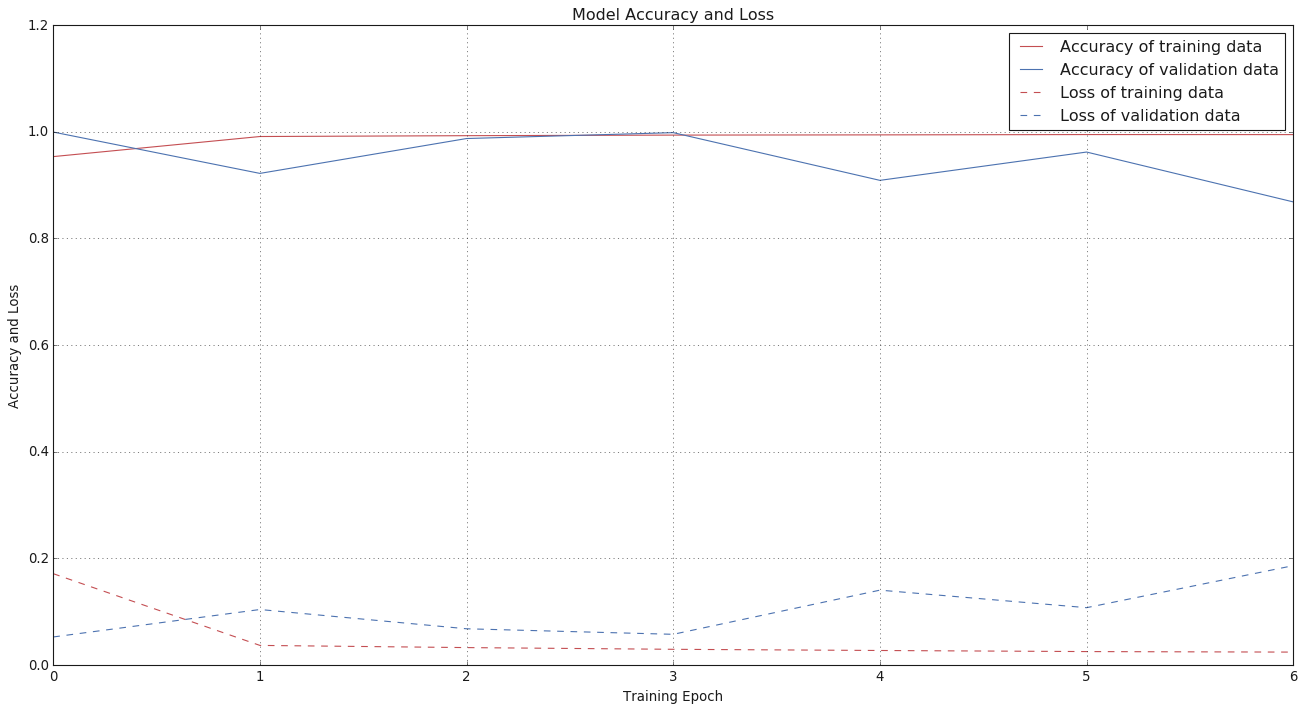

              precision    recall  f1-score   support

         0.0       0.74      0.96      0.84      2151
         1.0       1.00      0.97      0.98     25068

    accuracy                           0.97     27219
   macro avg       0.87      0.97      0.91     27219
weighted avg       0.98      0.97      0.97     27219



In [95]:

plt.figure(figsize=(20,10)).set_facecolor("w")
plt.style.use('classic')
plt.grid(True)
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim([0,1.2])
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))


y_pred_test = model_m.predict(x_test)

max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)

In [96]:
y_pred_ROC = model_m.predict_proba(x_test)
y_pred_ROC_test = np.argmax(y_pred_ROC, axis=1)
fpr , tpr , thresholds = roc_curve( max_y_test , y_pred_ROC_test)

In [97]:
roc_auc = auc(fpr, tpr)

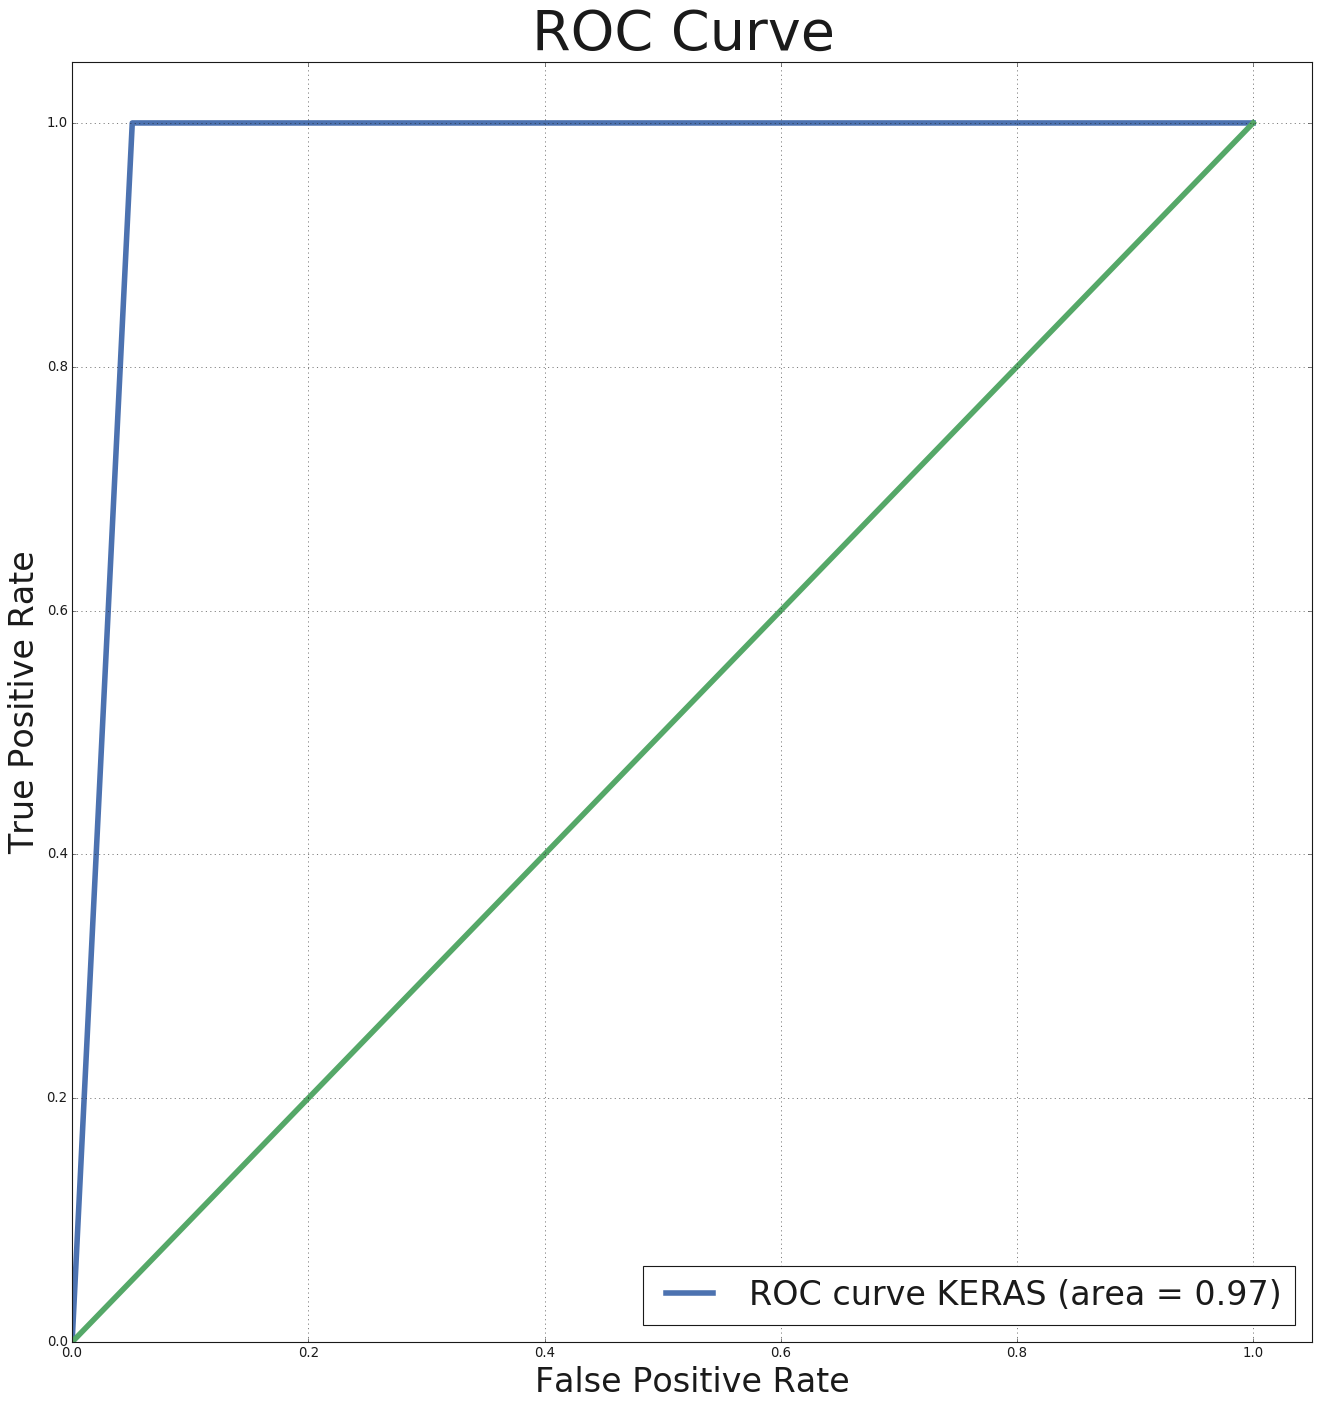

In [98]:

plt.figure(figsize=(20,20)).set_facecolor("w")
plt.style.use('classic')
plt.grid(True)
plt.plot(fpr, tpr, label='ROC curve KERAS (area = %0.2f)' % float(roc_auc),linewidth =5)
plt.plot([0, 1], [0, 1], '-',linewidth =5)
plt.xlabel('False Positive Rate',fontsize=30)
plt.ylabel('True Positive Rate',fontsize = 30)
plt.ylim([0,1.05])
plt.xlim([0,1.05])
plt.title('ROC Curve ',fontsize=50)
plt.legend(loc="lower right",fontsize=30)
plt.show()

In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
  
    plt.figure(figsize=(10,10 ))
    sns.set(font_scale=2)
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d',annot_kws={"size": 20})
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model_m.predict(x_test)

max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
#### pca transform on columns not row